In [1]:
%cd ..

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

from quantipy import utils as _utils
from quantipy.assets import Currency, Equity
from quantipy.trading import Broker, TripleMovingAverage
from quantipy.backtest import Backtester

%matplotlib inline
warnings.filterwarnings('ignore')

# backtest period
BACKTEST_START = '2016-01-01'
LIVE_START = '2019-01-01'

# trading universe
CAPITAL = 10_000
usd = Currency('USD')
spy = Equity('SPY', 'SPY')
MKT = [spy]
BENCHMARK = 'SPY'

# strategy
STRATEGY = TripleMovingAverage([spy], {})

# strategy parameters

PARAMS = {
    'history1': [4, 6, 8, 11], 
    'history2': [22, 25, 27, 28],
    'history3': [27, 30, 35, 40]
}

# optimization metric defined as a function of the equity curve
def METRIC(equity):
    returns = _utils.compute_returns(equity)
    return _utils.sortino(returns)

/home/luissimaoaf/self/dev/quantipy


In [2]:
# getting data
data = {}
for asset in MKT:
    ticker = yf.ticker.Ticker(asset.symbol)
    ticker_data = ticker.history(start=BACKTEST_START, end=LIVE_START,
                                 interval='1d')
    data[asset.symbol] = ticker_data

broker = Broker(data=data, initial_capital=CAPITAL, currency=usd)
backtester = Backtester(data)

opt_results = backtester.optimize(
    STRATEGY, broker, PARAMS, metric=METRIC, save_logs=False, benchmark=BENCHMARK
)

Preparing optimization...
Starting optimization...
{'history1': 4, 'history2': 22, 'history3': 27}
Score: 0.2068932650061309
{'history1': 4, 'history2': 22, 'history3': 30}
Score: 0.20732324636660987
{'history1': 4, 'history2': 22, 'history3': 35}
Score: 0.04286952447591388
{'history1': 4, 'history2': 22, 'history3': 40}
Score: -0.05471358271536939
{'history1': 4, 'history2': 25, 'history3': 27}
Score: 0.21883014279635649
{'history1': 4, 'history2': 25, 'history3': 30}
Score: 0.21928493228653467
{'history1': 4, 'history2': 25, 'history3': 35}
Score: 0.0614755488942429
{'history1': 4, 'history2': 25, 'history3': 40}
Score: -0.045246283489211676
{'history1': 4, 'history2': 27, 'history3': 27}
Score: nan
{'history1': 4, 'history2': 27, 'history3': 30}
Score: 0.30497384405124484
{'history1': 4, 'history2': 27, 'history3': 35}
Score: 0.1476687873630589
{'history1': 4, 'history2': 27, 'history3': 40}
Score: 0.05454280559771553
{'history1': 4, 'history2': 28, 'history3': 27}
Score: -1.5970819

Backtest Results
----------------------------------------
Metric           Strategy      Benchmark
----------------------------------------
Total Return:      14.13%         38.06%
Avg gain (day):     0.40%          0.51%
Avg loss (day):    -0.41%         -0.52%
Beta (BM):         0.4205              1
Sharpe Ratio:      0.6121         0.9696
Sortino Ratio:     0.8141         1.3397
----------------------------------------
Max Drawdown:     -13.16%        -19.35%
Avg Drawdown:      -3.53%         -1.98%
Avg DD Bars:           13              8
Longest DD:           205            131
----------------------------------------
Time in Market:    73.58%           100%
Trades:                17
Best Win:           9.19%
Avg Win:            3.49%
Worst Loss:        -4.23%
Avg Loss:          -2.10%
Win/Loss ratio:      1.12
Win %:             52.94%
Avg Trade Len:      30.41
Avg Win Len:        50.00
Avg Loss Len:        8.38


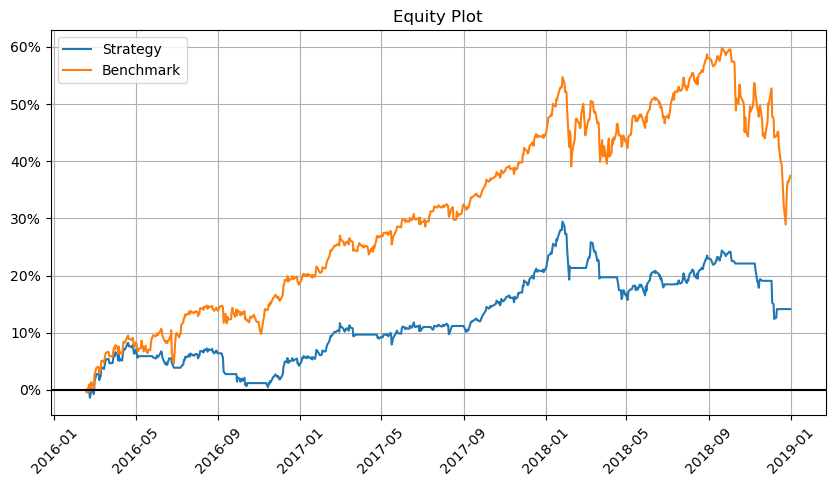

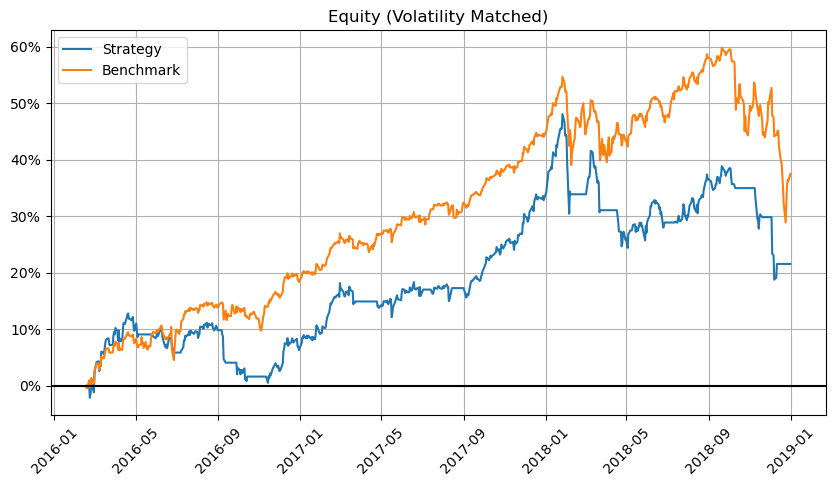

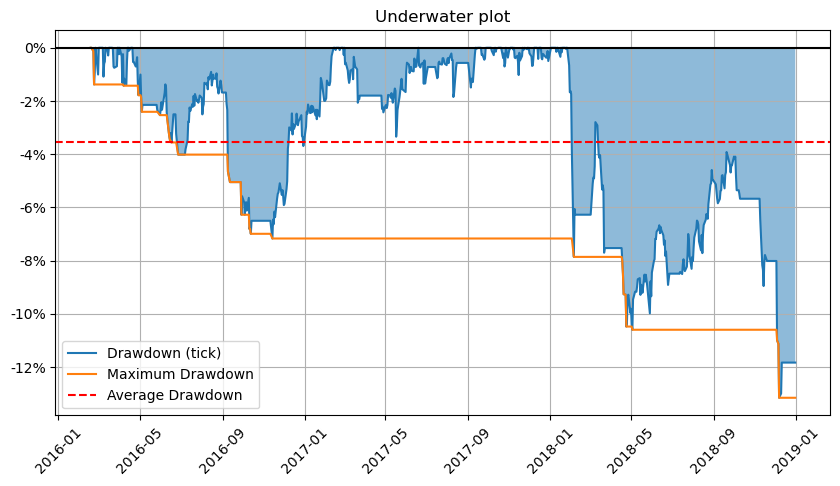

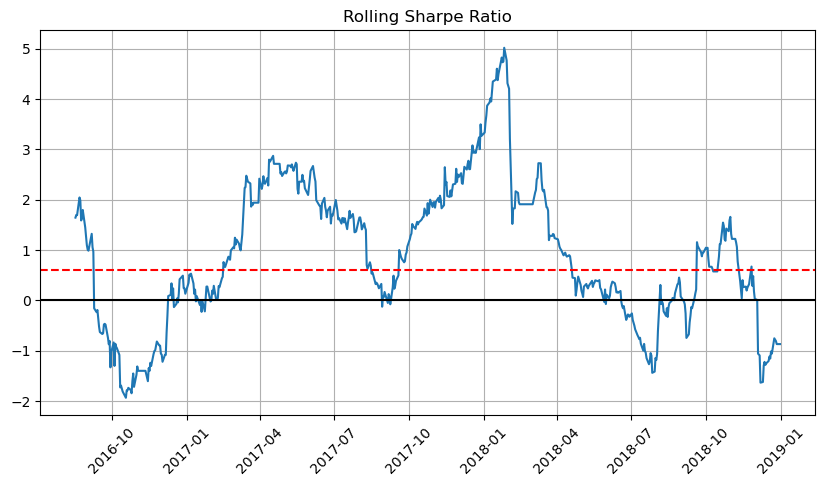

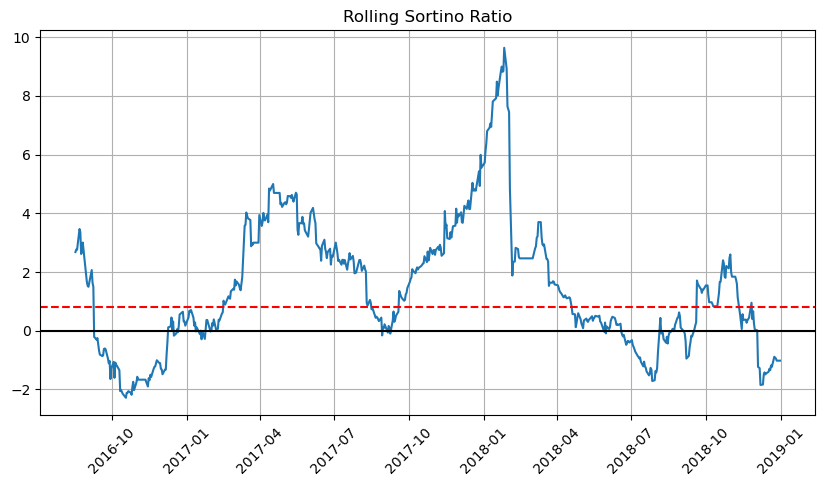

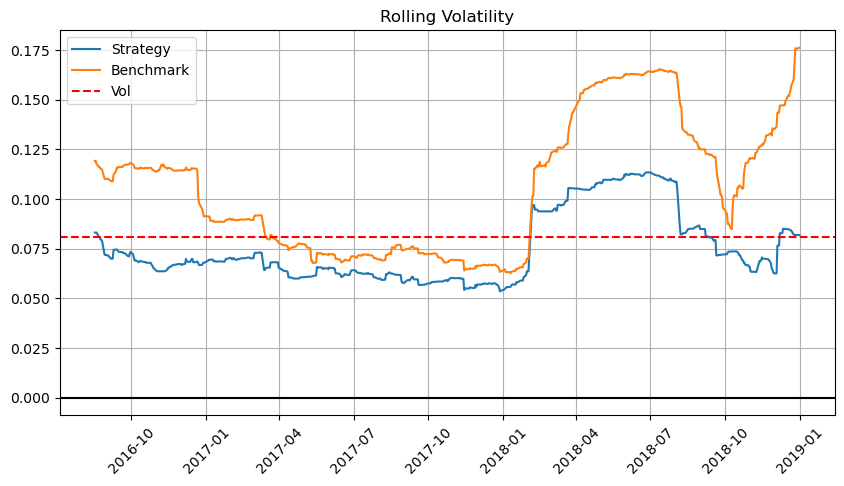

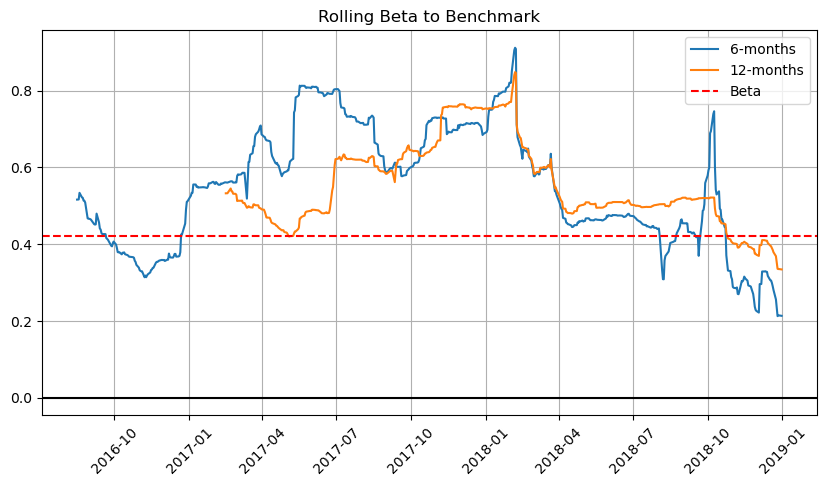

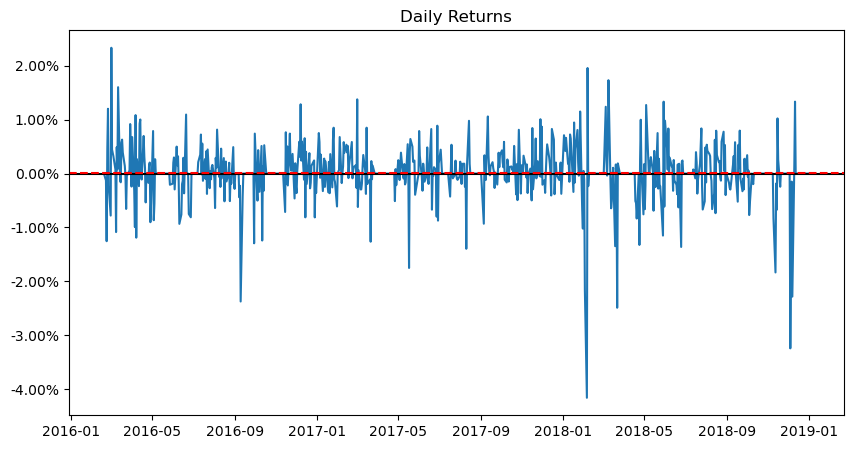

In [3]:
backtester.show_report()

In [4]:
# getting data
data = {}
for asset in MKT:
    ticker = yf.ticker.Ticker(asset.symbol)
    ticker_data = ticker.history(start=LIVE_START, interval='1d')
    data[asset.symbol] = ticker_data

# trading on 2x leverage
broker = Broker(data=data, initial_capital=CAPITAL, currency=usd, margin=0.5)
live_backtester = Backtester(data)

live_backtest = live_backtester.run(STRATEGY, broker, save_logs=True)

Backtest Results
----------------------------------------
Metric           Strategy      Benchmark
----------------------------------------
Total Return:     223.49%        120.99%
Avg gain (day):     1.23%          0.83%
Avg loss (day):    -1.26%         -0.86%
Beta (BM):         0.6887              1
Sharpe Ratio:      1.0483         0.8269
Sortino Ratio:     1.4966         1.1570
----------------------------------------
Max Drawdown:     -25.72%        -33.72%
Avg Drawdown:      -6.00%         -5.87%
Avg DD Bars:           16             11
Longest DD:           210            488
----------------------------------------
Time in Market:    70.99%           100%
Trades:                26
Best Win:          18.13%
Avg Win:            6.85%
Worst Loss:        -8.19%
Avg Loss:          -3.09%
Win/Loss ratio:      1.36
Win %:             57.69%
Avg Trade Len:      36.12
Avg Win Len:        50.53
Avg Loss Len:       16.45


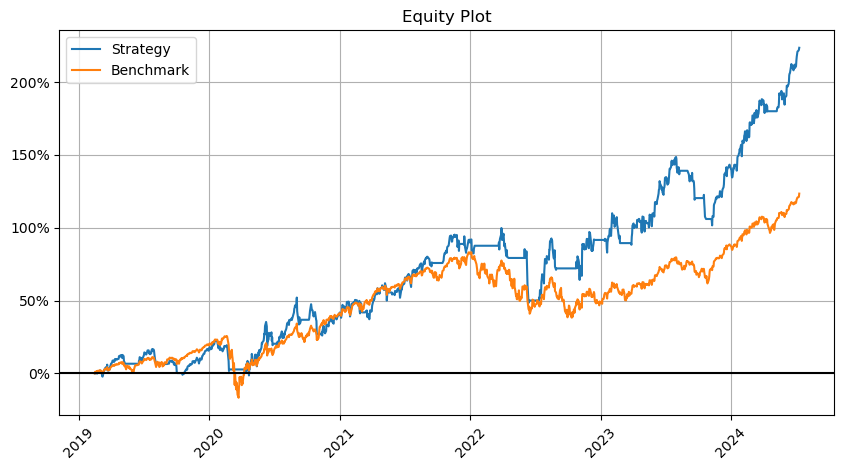

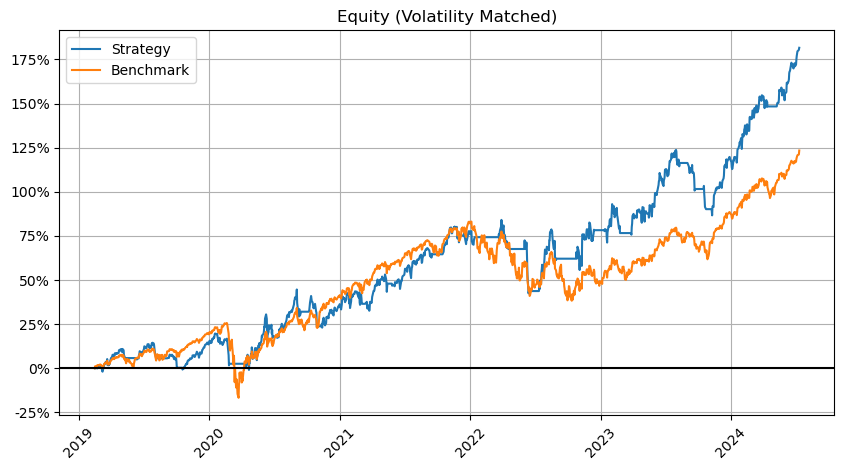

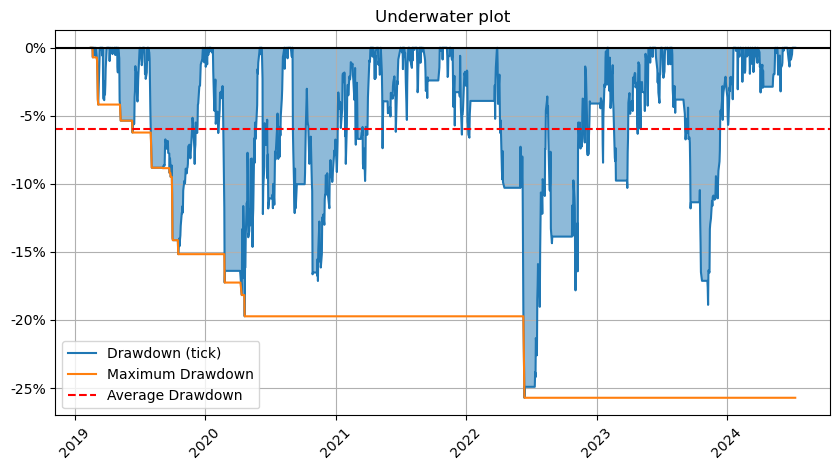

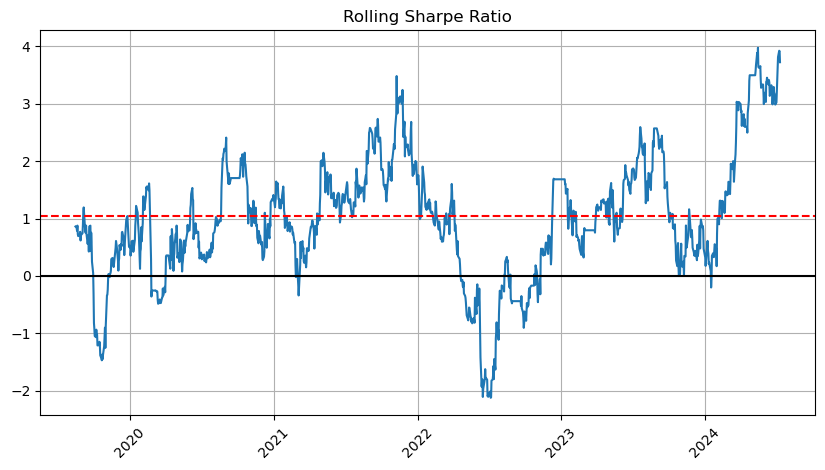

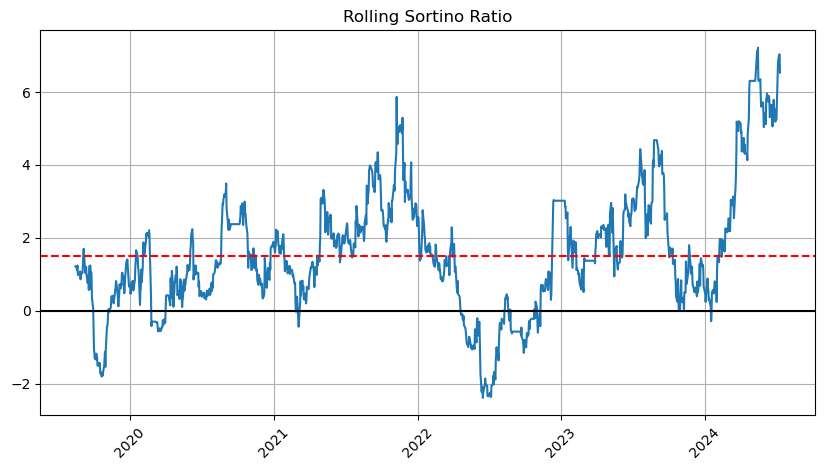

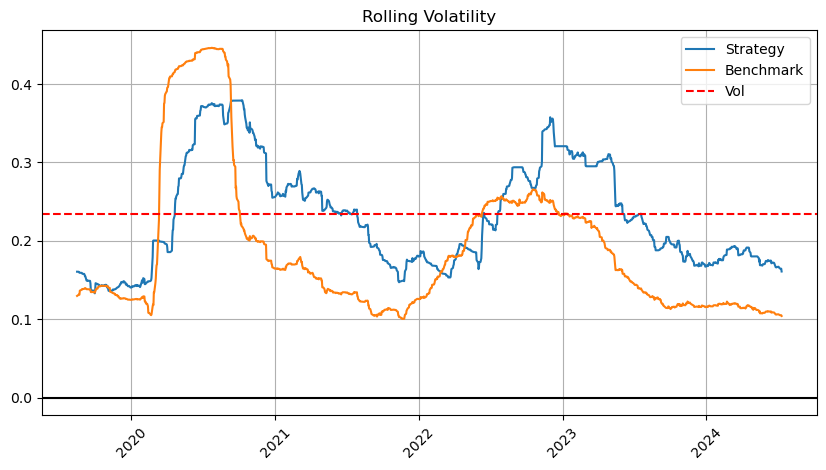

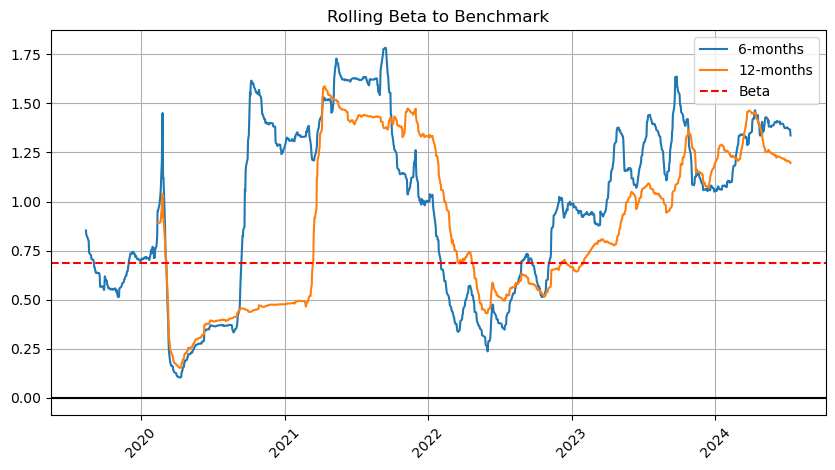

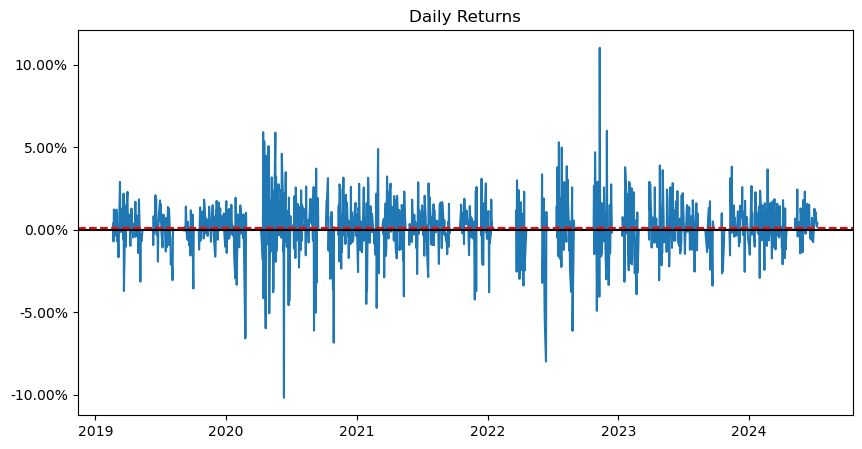

In [5]:
results = live_backtester.process_results(benchmark=BENCHMARK)
live_backtester.show_report()